<a href="https://colab.research.google.com/github/PandukaBandara99/CPPBooks/blob/main/ConcurrentProgramming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mahela Panduka Bandara ; <br> UG @ Dpt. of Electronic & Electrical Engineering ;<br> University of Peradeniya ;<br> 2024/01 <br><br> Email : e19039@end.pdn.ac.lk <br> LinkedIN : https://www.linkedin.com/in/pandukabandara/

# **1.0 Introduction to Concurrent Programming**

## 1.2 Multi-Threading

 This explains the expected behavior of of multi-Threaded Programme. `T1` and `T2` represent threads, and the arrows indicate the flow of execution.

```
  T1                        T2
  |                         |
  v                         v
print_numbers(0)            print_letters('A')
  |                         |
  v                         v
sleep(1)                    sleep(1)
  |                         |
  v                         v
print_numbers(1)            print_letters('B')
  |                         |
  v                         v
sleep(1)                    sleep(1)
  |                         |
  v                         v
print_numbers(2)            print_letters('C')
  |                         |
  v                         v
sleep(1)                    sleep(1)
  |                         |
  v                         v
print_numbers(3)            print_letters('D')
  |                         |
  v                         v
sleep(1)                    sleep(1)
  |                         |
  v                         v
print_numbers(4)            print_letters('E')
  |                         |
  v                         v
sleep(1)                    sleep(1)
  |                         |
  v                         v
Thread 1 has finished       Thread 2 has finished
Thread 2 has finished
```
The threads run concurrently, and their execution interleaves until both threads finish their tasks.


## 1.2 Pitfalls in Concurrent Programming

### **1.2.1 Race Conditions:**

A race condition occurs when multiple threads or processes access shared data concurrently, and the final outcome depends on the timing or order of their execution. <br>
It can lead to unpredictable and erroneous behavior, as the result depends on the interleaving of operations by different threads. <br>
> **Example:** Two threads simultaneously incrementing a shared counter without proper synchronization could lead to data corruption or incorrect results.

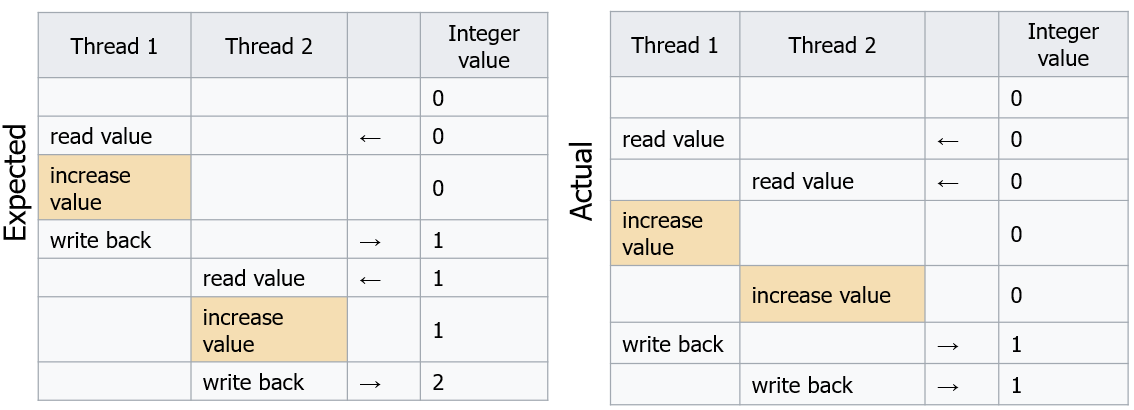

### **1.2.2 Resource Contention:**

Resource contention happens when multiple threads or processes compete for the same resource, such as a file, database, or network connection. <br>
Competition for resources can lead to performance degradation, increased waiting times, or even deadlock situations if not managed properly. <br>
> **Example:** Multiple threads trying to write to the same file concurrently may result in conflicts and data corruption if not synchronized.


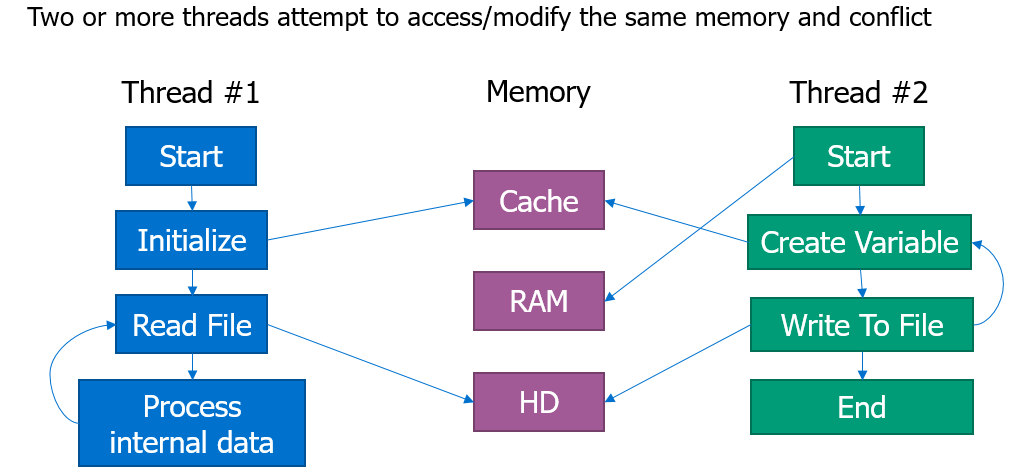

### **1.2.3 Deadlock:**

A deadlock is a situation in which two or more threads or processes are unable to proceed because each is waiting for the other to release a resource. <br>
It results in a standstill where none of the processes can make progress, leading to a system or application freeze. <br>
> **Example:** Thread A holds Resource X and waits for Resource Y, while Thread B holds Resource Y and waits for Resource X, causing a deadlock.

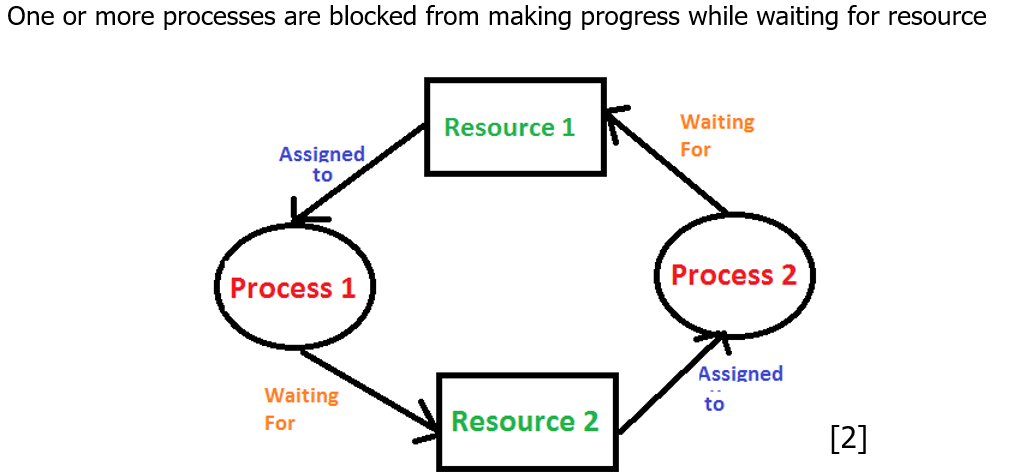

### **1.2.4 Live Lock:**


A live lock occurs when multiple threads or processes continuously change their state in response to the actions of the others without making progress. <br>
Threads are actively trying to resolve a contention, but due to their interactions, none of them succeeds in making progress.
> **Example:** Two threads courteously trying to yield to each other in a shared space but end up in a loop of politeness without making any progress.

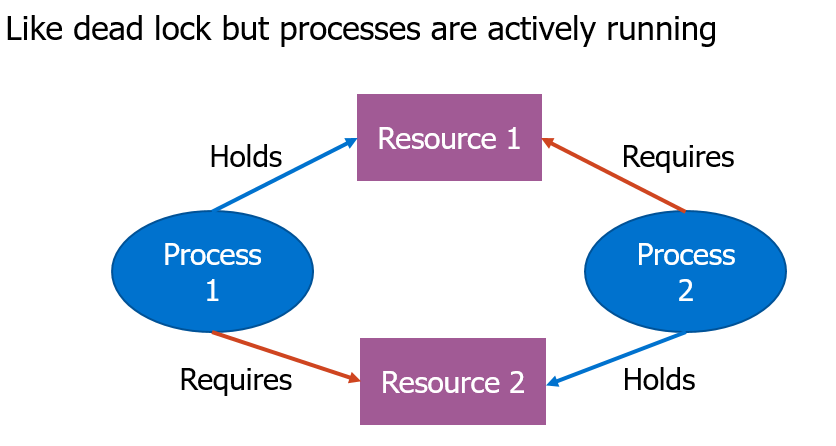

### **1.2.5 Resource Over/Under Utilization:**

**Overutilization:** Occurs when resources are heavily loaded or have more demands than they can handle, leading to decreased performance and potential bottlenecks. <br>
**Underutilization:** Happens when resources are not used efficiently, and there is idle time or capacity that could be better utilized for improved system performance. <br>
> Example (Overutilization):** A server with too many active connections may become overloaded, causing delays and affecting response times.

>**Example (Underutilization):** A system with powerful hardware running at a fraction of its capacity, not making full use of available resources.

## **1.3 Programming Challanges -1**

### **1.3.1 Producer-Consumer Problem**


**Problem Description:**

Two types of processes: producers and consumers. Both share a common, fixed-size buffer (or queue). The primary goal is to ensure that producers do not produce items when the buffer is full, and consumers do not consume items when the buffer is empty. The challenge is to coordinate the activities of producers and consumers efficiently to prevent issues like race conditions and ensure proper resource utilization.

**Pseudo Code:**

Common Declarations:
```
Define buffer_size as the size of the shared buffer (e.g., 5)
Define a buffer as a data structure that supports adding and removing items (e.g., a queue)
Initialize the buffer to be empty
```

Producer Pseudo Code:
```
while true:
    item = produce_item()  // Produce an item
    wait_if_buffer_full()
    add_item_to_buffer(item)
    signal_consumer_if_needed()
```

Consumer Pseudo Code:
```plaintext
while true:
    wait_if_buffer_empty()
    item = remove_item_from_buffer()
    consume_item(item)
    signal_producer_if_needed()
```



**Solutions in Python**

 C++ Solution:

```cpp
#include <iostream>
#include <thread>
#include <mutex>
#include <condition_variable>
#include <queue>
#include <chrono>
#include <random>

const int buffer_size = 5;
std::queue<int> buffer;
std::mutex mutex;
std::condition_variable buffer_not_full, buffer_not_empty;
int items_produced = 0;
int items_consumed = 0;

int produce_item() {
    return ++items_produced;
}

void consume_item(int item) {
    ++items_consumed;
    std::cout << "Consumed " << item << ". Buffer: ";
    for (auto& elem : buffer) {
        std::cout << elem << " ";
    }
    std::cout << std::endl;
}

void wait_if_buffer_full() {
    while (buffer.size() == buffer_size) {
        std::this_thread::sleep_for(std::chrono::milliseconds(100));
    }
}

void wait_if_buffer_empty() {
    while (buffer.empty()) {
        std::this_thread::sleep_for(std::chrono::milliseconds(100));
    }
}

void add_item_to_buffer(int item) {
    std::unique_lock<std::mutex> lock(mutex);
    buffer.push(item);
    std::cout << "Produced " << item << ". Buffer: ";
    for (auto& elem : buffer) {
        std::cout << elem << " ";
    }
    std::cout << std::endl;
    lock.unlock();
    buffer_not_empty.notify_all();
}

int remove_item_from_buffer() {
    std::unique_lock<std::mutex> lock(mutex);
    int item = buffer.front();
    buffer.pop();
    lock.unlock();
    buffer_not_full.notify_all();
    return item;
}

void producer() {
    while (true) {
        int item = produce_item();
        wait_if_buffer_full();
        add_item_to_buffer(item);
        std::this_thread::sleep_for(std::chrono::milliseconds(rand() % 500 + 100));
    }
}

void consumer() {
    while (true) {
        wait_if_buffer_empty();
        int item = remove_item_from_buffer();
        consume_item(item);
        std::this_thread::sleep_for(std::chrono::milliseconds(rand() % 500 + 100));
    }
}

int main() {
    std::thread producer_thread(producer);
    std::thread consumer_thread(consumer);

    producer_thread.join();
    consumer_thread.join();

    return 0;
}
```

Comments:

- Both solutions use a shared buffer, mutex (or lock), and condition variables to coordinate the activities of producers and consumers.
- Producers and consumers are simulated to run indefinitely with random sleep times to demonstrate continuous production and consumption.
- The `wait_if_buffer_full` and `wait_if_buffer_empty` functions ensure that producers wait when the buffer is full, and consumers wait when the buffer is empty.
- Proper synchronization is maintained to avoid race conditions and ensure the safety of shared data structures.
- The example does not include explicit signaling for producers and consumers in this simple scenario. More complex scenarios might require additional signaling mechanisms.

In [3]:
import threading
import random
import time

# Dining philosophers, 5 Phillies with 5 forks. Must have two forks to eat.
#
# Deadlock is avoided by never waiting for a fork while holding a fork (locked)
# Procedure is to do block while waiting to get first fork, and a nonblocking
# acquire of second fork.  If failed to get second fork, release first fork,
# swap which fork is first and which is second and retry until getting both.
#
# See discussion page note about 'live lock'.

class Philosopher(threading.Thread):

    running = True

    def __init__(self, xname, forkOnLeft, forkOnRight):
        threading.Thread.__init__(self)
        self.name = xname
        self.forkOnLeft = forkOnLeft
        self.forkOnRight = forkOnRight

    def run(self):
        while(self.running):
            #  Philosopher is thinking (but really is sleeping).
            time.sleep( random.uniform(3,13))
            print('%s is hungry.' % self.name)
            self.dine()

    def dine(self):
        fork1, fork2 = self.forkOnLeft, self.forkOnRight

        while self.running:
            fork1.acquire(True)
            locked = fork2.acquire(False)
            if locked: break
            fork1.release()
            print ('%s swaps forks' % self.name)
            fork1, fork2 = fork2, fork1
        else:
            return

        self.dining()
        fork2.release()
        fork1.release()

    def dining(self):
        print ('%s starts eating '% self.name)
        time.sleep(random.uniform(1,10))
        print ('%s finishes eating and leaves to think.' % self.name)

def DiningPhilosophers():
    forks = [threading.Lock() for n in range(5)]
    philosopherNames = ('Aristotle','Kant','Spinoza','Marx', 'Russel')

    philosophers= [Philosopher(philosopherNames[i], forks[i%5], forks[(i+1)%5]) \
            for i in range(5)]

    random.seed(507129)
    Philosopher.running = True
    for p in philosophers: p.start()
    time.sleep(100)
    Philosopher.running = False
    print ("Now we're finishing.")

DiningPhilosophers()

Russel is hungry.
Russel starts eating 
Aristotle is hungry.
Marx is hungry.
Marx swaps forks
Kant is hungry.
Kant starts eating 
Spinoza is hungry.
Russel finishes eating and leaves to think.
Aristotle swaps forks
Marx starts eating 
Kant finishes eating and leaves to think.
Spinoza swaps forks
Aristotle starts eating 
Marx finishes eating and leaves to think.
Spinoza starts eating 
Russel is hungry.
Russel swaps forks
Aristotle finishes eating and leaves to think.
Russel starts eating 
Spinoza finishes eating and leaves to think.
Marx is hungry.
Marx swaps forks
Russel finishes eating and leaves to think.
Marx starts eating 
Aristotle is hungry.
Aristotle starts eating 
Kant is hungry.
Marx finishes eating and leaves to think.
Spinoza is hungry.
Spinoza starts eating 
Russel is hungry.
Russel swaps forks
Spinoza finishes eating and leaves to think.
Aristotle finishes eating and leaves to think.
Kant starts eating 
Russel starts eating 
Spinoza is hungry.
Marx is hungry.
Marx swaps fo

### 1.3.2 Sleeping Barber Problem

**Key Components:**
1. **Barber Shop:** A place where the barber works and customers come to get haircuts.
2. **Barber:** The individual providing haircuts to customers.
3. **Customers:** Individuals seeking haircuts at the barber shop.
4. **Waiting Area:** Space where customers wait for their turn to get a haircut.
5. **Barber Chair:** The chair where the barber performs haircuts.

**Problem Constraints:**
1. The barber can either be cutting hair or sleeping in the absence of customers.
2. If a customer arrives and the barber is sleeping, the customer wakes up the barber.
3. If a customer arrives and the barber is busy, the customer waits in the waiting area.
4. The barber serves one customer at a time.
5. Customers are served in a first-come, first-served order.

**Example Cases:**

1. **Scenario 1: Barber and Customer Interaction**
   - Initial state: Barber is sleeping.
   - Customer arrives, wakes up the barber.
   - Barber cuts the customer's hair.
   - After the haircut, the customer leaves, and the barber goes back to sleep.

2. **Scenario 2: Multiple Customers**
   - Initial state: Barber is sleeping.
   - Customer1 arrives, wakes up the barber, and gets a haircut.
   - While Customer1 is getting a haircut, Customer2 arrives and waits in the waiting area.
   - After the haircut, Customer1 leaves, and the barber serves Customer2.
   - The process continues with additional customers arriving.

3. **Scenario 3: No Customers**
   - Initial state: Barber is sleeping.
   - No customers are present, so the barber remains asleep until a customer arrives.

4. **Scenario 4: Barber Waiting for Customers**
   - Initial state: Barber is awake and waiting.
   - No customers are present, so the barber remains awake but idle until a customer arrives.



In [4]:
import time, random, threading
from queue import Queue

CUSTOMERS_SEATS = 15        #Number of seats in BarberShop
BARBERS = 3                #Number of Barbers working
EVENT = threading.Event()   #Event flag, keeps track of Barber/Customer interactions
global Earnings
global SHOP_OPEN

class Customer(threading.Thread):       #Producer Thread
    def __init__(self, queue):          #Constructor passes Global Queue (all_customers) to Class
        threading.Thread.__init__(self)
        self.queue = queue
        self.rate = self.whatCustomer()

    def whatCustomer(self):
        cust_types = ["adult","senior","student","child"]
        cust_rates = {"adult":16,
                    "senior":7,
                    "student":10,
                    "child":7}
        t = random.choice(cust_types)
        print(t + " rate.")
        return cust_rates[t]

    def run(self):
        if not self.queue.full(): #Check queue size
            EVENT.set() #Sets EVENT flag to True i.e. Customer available in the Queue
            EVENT.clear() #Alerts Barber that their is a Customer available in the Queue
        else:
            print("Queue full, customer has left.") #If Queue is full, Customer leaves.

    def trim(self):
        print("Customer haircut started.")
        a = 3 * random.random() #Retrieves random number.
        time.sleep(a) #Simulates the time it takes for a barber to give a haircut.
        payment = self.rate
        print("Haircut finished. Haircut took {}".format(a))    #Barber finished haircut.
        global Earnings
        Earnings += payment


class Barber(threading.Thread):     #Consumer Thread
    def __init__(self, queue):      #Constructor passes Global Queue (all_customers) to Class
        threading.Thread.__init__(self)
        self.queue = queue
        self.sleep = True   #No Customers in Queue therefore Barber sleeps by deafult

    def is_empty(self, queue):  #Simple function that checks if there is a customer in the Queue and if so
        if self.queue.empty():
            self.sleep = True   #If nobody in the Queue Barber sleeps.
        else:
            self.sleep = False  #Else he wakes up.
        print("------------------\nBarber sleep {}\n------------------".format(self.sleep))

    def run(self):
        global SHOP_OPEN
        while SHOP_OPEN:
            while self.queue.empty():
                EVENT.wait()    #Waits for the Event flag to be set, Can be seen as the Barber Actually sleeping.
                print("Barber is sleeping...")
            print("Barber is awake.")
            cust = self.queue
            self.is_empty(self.queue)
            cust = cust.get()  #FIFO Queue So first customer added is gotten.
            cust.trim() #Customers Hair is being cut
            cust = self.queue
            cust.task_done()    #Customers Hair is cut
            print(self.name)    #Which Barber served the Customer

def wait():
    time.sleep(1 * random.random())

if __name__ == '__main__':
    Earnings = 0
    SHOP_OPEN = True
    barbers = []
    all_customers = Queue(CUSTOMERS_SEATS) #A queue of size Customer Seats

    for b in range(BARBERS):
        b=Barber(all_customers) #Passing the Queue to the Barber class
        b.daemon=True   #Makes the Thread a super low priority thread allowing it to be terminated easier
        b.start()   #Invokes the run method in the Barber Class
        barbers.append(b)   #Adding the Barber Thread to an array for easy referencing later on.
    for c in range(10): #Loop that creates infinite Customers
        print("----")
        print(all_customers.qsize())    #Simple Tracker too see the qsize (NOT RELIABLE!)
        wait()
        c = Customer(all_customers) #Passing Queue object to Customer class
        all_customers.put(c)    #Puts the Customer Thread in the Queue
        c.start()   #Invokes the run method in the Customer Class
    all_customers.join()    #Terminates all Customer Threads
    print("€"+str(Earnings))
    SHOP_OPEN = False
    for i in barbers:
        i.join()    #Terminates all Barbers
        #Program hangs due to infinite loop in Barber Class, use ctrl-z to exit.

----
0
student rate.
Barber is sleeping...
Barber is awake.
------------------
Barber sleep False
------------------
Customer haircut started.
Barber is sleeping...----
0
Barber is sleeping...

adult rate.
Barber is sleeping...----
1
Barber is sleeping...
Barber is awake.
------------------
Barber sleep False
------------------
Customer haircut started.

student rate.
----
1
Barber is sleeping...
Barber is awake.
------------------
Barber sleep False
------------------
Customer haircut started.
adult rate.
----
1
adult rate.
----
2
Haircut finished. Haircut took 1.5174712620624526
Thread-17
Barber is awake.
------------------
Barber sleep False
------------------
Customer haircut started.
Haircut finished. Haircut took 1.7387241382339536
Thread-15
Barber is awake.
------------------
Barber sleep False
------------------
Customer haircut started.
Haircut finished. Haircut took 2.8072069658140353
Thread-16
adult rate.
----
1
Barber is sleeping...
Barber is awake.
------------------
Barbe

KeyboardInterrupt: 